# Lab 5: Exploring Data

# Instructor: Li Zeng (lizeng@uw.edu)


Learning Objectives:

The lab leads you to pratice how to perform exploratory data analysis. You will get hands-on experiences in
1. Formulating a question
2. Inspecting data
3. Exploring data

You will follow the demo on a basic EDA on an example dataset on all flights that departed NYC (i.e. JFK, LGA or EWR) in 2013. You can download the dataset from canvas (flights.csv).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Import and Inspect Data

In [3]:
# Import data
flights_df= pd.read_csv('flights.csv')

In [4]:
# Look at top and bottom
print(flights_df.head())
print(flights_df.tail())

   Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  arr_delay  \
0           1  2013      1    1     517.0        2.0     830.0       11.0   
1           2  2013      1    1     533.0        4.0     850.0       20.0   
2           3  2013      1    1     542.0        2.0     923.0       33.0   
3           4  2013      1    1     544.0       -1.0    1004.0      -18.0   
4           5  2013      1    1     554.0       -6.0     812.0      -25.0   

  carrier tailnum  flight origin dest  air_time  distance  hour  minute  
0      UA  N14228    1545    EWR  IAH     227.0      1400   5.0    17.0  
1      UA  N24211    1714    LGA  IAH     227.0      1416   5.0    33.0  
2      AA  N619AA    1141    JFK  MIA     160.0      1089   5.0    42.0  
3      B6  N804JB     725    JFK  BQN     183.0      1576   5.0    44.0  
4      DL  N668DN     461    LGA  ATL     116.0       762   5.0    54.0  
        Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  \
336771      336772  20

In [5]:
# Look at structure, check n’s
print(flights_df.shape)
print(flights_df.columns)
print(flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [6]:
# Look at descriptive stats and check for missing values
print(flights_df.describe())

          Unnamed: 0      year          month            day       dep_time  \
count  336776.000000  336776.0  336776.000000  336776.000000  328521.000000   
mean   168388.500000    2013.0       6.548510      15.710787    1349.109947   
std     97219.001466       0.0       3.414457       8.768607     488.281791   
min         1.000000    2013.0       1.000000       1.000000       1.000000   
25%     84194.750000    2013.0       4.000000       8.000000     907.000000   
50%    168388.500000    2013.0       7.000000      16.000000    1401.000000   
75%    252582.250000    2013.0      10.000000      23.000000    1744.000000   
max    336776.000000    2013.0      12.000000      31.000000    2400.000000   

           dep_delay       arr_time      arr_delay         flight  \
count  328521.000000  328063.000000  327346.000000  336776.000000   
mean       12.639070    1502.054999       6.895377    1971.923620   
std        40.210061     533.264132      44.633292    1632.471938   
min       -4

After inspecting the data and reading the data documentation (https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf), we can conclude that this data was collected
by the Bureau of Transportation Statistics. The data themselves are reported to the U.S. Department of
Transportation (DOT), Bureau of Transportation Statistics (BTS) by the 14 U.S. air carriers that have at
least 1% of total domestic scheduled-service passenger revenues. The following variables are available in this
data:

* year, month, day: date of departure
* dep_time, arr_time: departure and arrival times, local time zone
* dep_delay, arr_delay: departure and arrival delays, in minutes. Negative times represent early
departures/arrivals.
* carrier: two letter carrier abbreviation. See airlines to get full names.
* tailnum: plane tail number, used to identify aircraft
* flight: flight number
* origin, dest: origin and destination. See airports for additional metadata.
* air_time: amount of time spent in the air
* distance: distance flown
* hour, minute: time of departure

Looking at a summary of the data, we see that most variables are numeric data types, while carrier, tailnum,
origin and dest are character types. We also see there is missing data on flight information such as air_time
and departure/arrival statistics.

### Formulate Questions and Explore Data
Flights are often delayed. Let's formulate some questions around delayed flights aiming to better
understand when flight delays occur and why. This questions are likely of interest to travelers who do not
like to spend time at the airport.

#### 1. Which date has the largest average arrival delay?

In [7]:
flights_df['date']=pd.to_datetime(flights_df[['year','month','day']],format='%Y%m%d')
flights_df.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,2013-01-01
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,2013-01-01
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,2013-01-01
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,2013-01-01
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,2013-01-01


In [12]:
# arrival delay
arr_delay_series = flights_df.groupby('date')['arr_delay'].mean()
arr_delay_series

date
2013-01-01    12.651023
2013-01-02    12.692888
2013-01-03     5.733333
2013-01-04    -1.932819
2013-01-05    -1.525802
2013-01-06     4.236429
2013-01-07    -4.947312
2013-01-08    -3.227578
2013-01-09    -0.264278
2013-01-10    -5.898816
2013-01-11    -4.762268
2013-01-12   -13.016153
2013-01-13    14.931846
2013-01-14     3.640303
2013-01-15     0.425653
2013-01-16    34.247362
2013-01-17     6.492896
2013-01-18     1.841758
2013-01-19    -8.526080
2013-01-20     3.740077
2013-01-21     6.315965
2013-01-22    12.276836
2013-01-23     6.917793
2013-01-24    15.427313
2013-01-25    27.098976
2013-01-26     0.751118
2013-01-27    -1.308933
2013-01-28     9.319720
2013-01-29    -6.555811
2013-01-30    25.910804
                ...    
2013-12-02     0.450902
2013-12-03     2.222798
2013-12-04    -0.222222
2013-12-05    51.666255
2013-12-06    21.119469
2013-12-07     5.057057
2013-12-08    36.911801
2013-12-09    42.575556
2013-12-10    44.508796
2013-12-11    10.902439
2013-12-12 

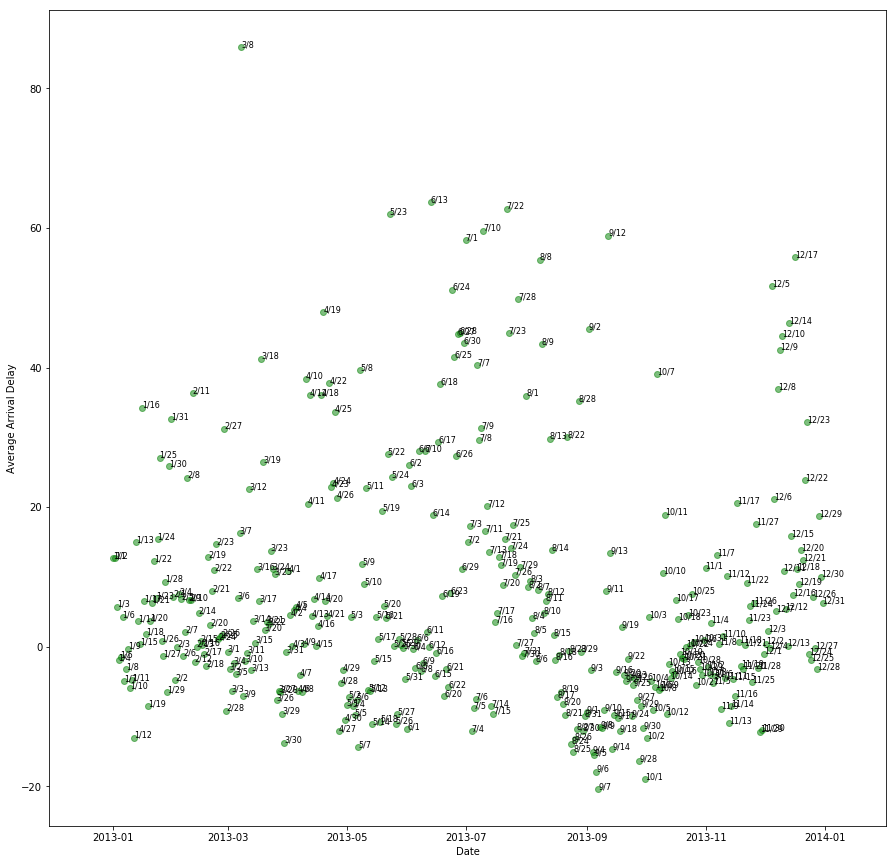

In [10]:
# graphical method 
fig, ax = plt.subplots(figsize= (15,15))
x = arr_delay_series.index
y = arr_delay_series.values
ax.scatter(x, y, color = 'green', alpha=0.5)
for i, txt in enumerate(arr_delay_series.index):
    ax.annotate("/".join([str(txt.month),str(txt.day)]), (x[i], y[i]), fontsize=8)
ax.set(xlabel = 'Date', ylabel = 'Average Arrival Delay')
plt.show()

In [11]:
# non-graphical method
arr_delay_series.sort_values(ascending=False).head(1)

date
2013-03-08    85.862155
Name: arr_delay, dtype: float64

Response: For flights from NYC in 2013, March, 8th, 2013 had largest average arrival delay.

#### Your turn: Which date has the largest average departure delay? 

In [14]:
# Your codes here
dep_delay_series = flights_df.groupby('date')['dep_delay'].mean()
dep_delay_series.sort_values(ascending=False).head(1)

date
2013-03-08    83.536921
Name: dep_delay, dtype: float64

**Answer: The largest average departure delay was on March 8th, 2013**

#### What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?

There are many ways to define the "worst" day to fly out of NYC in 2013. We might say the
worst day is the one with the largest average departure delay and the longest average arrival delay.

In [16]:
delay_series=pd.DataFrame()
delay_series['avg_dep_delay']=flights_df.groupby('date')['dep_delay'].mean()
delay_series['avg_arr_delay']=flights_df.groupby('date')['arr_delay'].mean()
print(delay_series.head())

            avg_dep_delay  avg_arr_delay
date                                    
2013-01-01      11.548926      12.651023
2013-01-02      13.858824      12.692888
2013-01-03      10.987832       5.733333
2013-01-04       8.951595      -1.932819
2013-01-05       5.732218      -1.525802


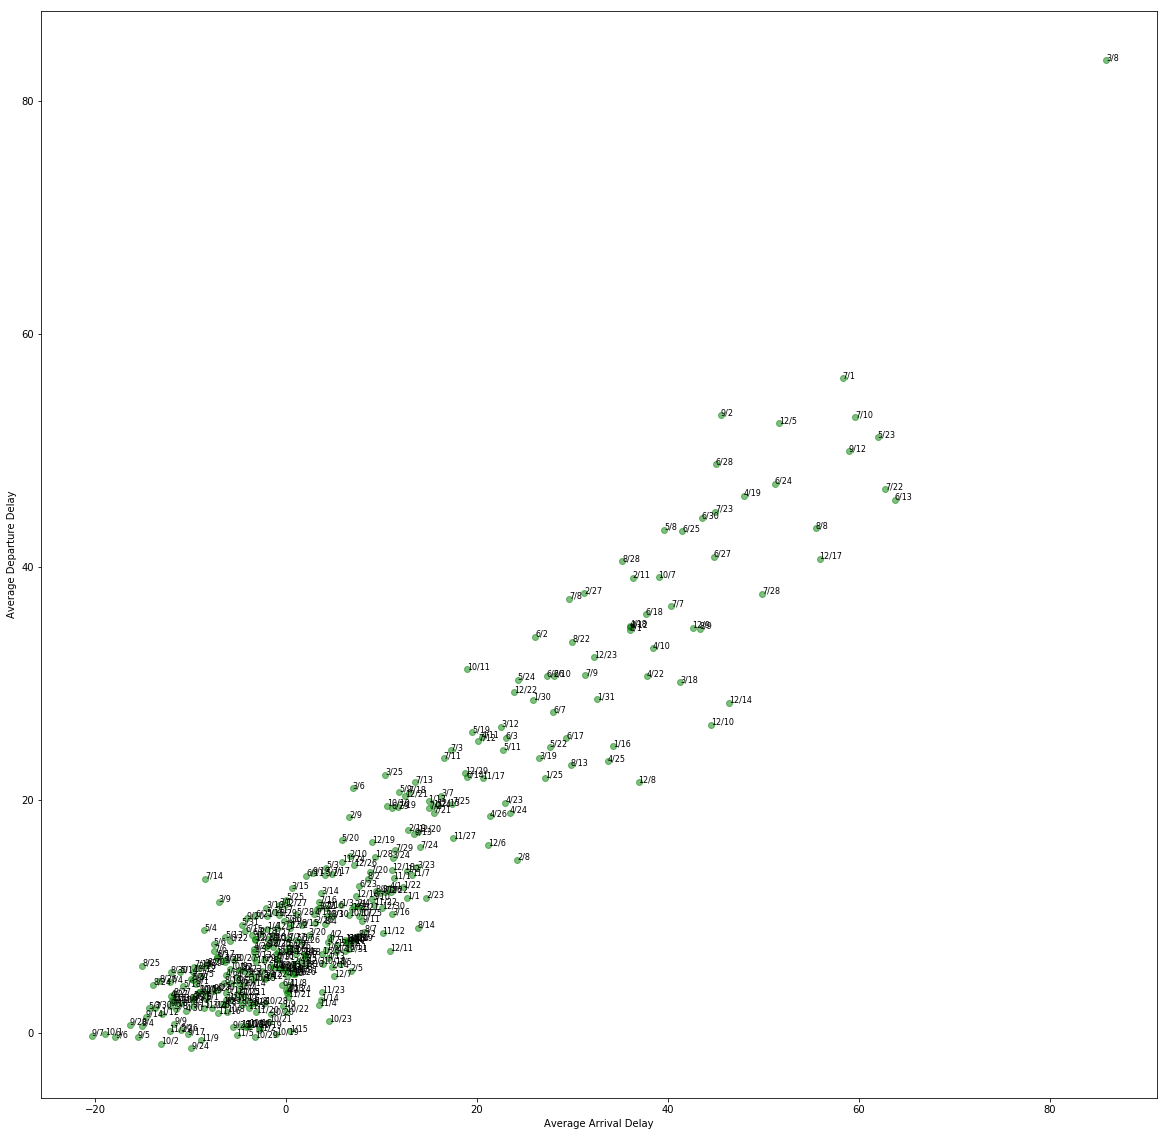

In [18]:
fig, ax = plt.subplots(figsize= (20,20))

x = delay_series['avg_arr_delay'].values
y = delay_series['avg_dep_delay'].values
ax.scatter(x, y, color = 'green', alpha=0.5)
for i, txt in enumerate(delay_series.index):
    ax.annotate("/".join([str(txt.month),str(txt.day)]), (x[i], y[i]), fontsize=8)
ax.set(xlabel = 'Average Arrival Delay', ylabel = 'Average Departure Delay')
plt.show()

#### Your turn: What was the worst day in terms of total number of departure flights delayed.

In [39]:
# Your code here
delay_series['count_of_flights_delayed'] = flights_df[flights_df['dep_delay'] > 0.0].groupby('date')['dep_delay'].count()
delay_series['count_of_flights_delayed'].sort_values(ascending=False).head(1)


date
2013-12-23    674
Name: count_of_flights_delayed, dtype: int64

**Answer: The worst day in terms of total number of departure flights delayes was December 12, 2013. There were a total of 674 flights delayed on the day**.

#### Are there any seasonal patterns in departure delays for flights from NYC?

In [40]:
delay_by_month_series = flights_df.groupby('month')['dep_delay'].mean()

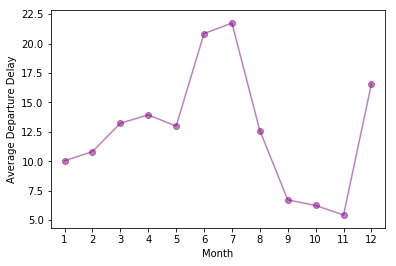

In [41]:
x = delay_by_month_series.index
y = delay_by_month_series.values
fig, ax = plt.subplots()
ax.plot(x, y, color = 'purple', alpha=0.5)
ax.scatter(x, y, color = 'purple', alpha=0.5)
ax.set(xlabel = 'Month', ylabel = 'Average Departure Delay')
ax.set_xlim([0.5,12.5])
ax.set_xticks(np.arange(1,13))
plt.show()

Response: Overall departure delays from NYC are increasing from January through July, and lowest from August through the end of November. This indicates that the autumn may have lower average departure delays for flights from NYC.

#### Your turn: On average, how do departure delays vary over the course of a day?

In [45]:
# Your codes here
delay_by_hour_series = flights_df.groupby('hour')['dep_delay'].mean()

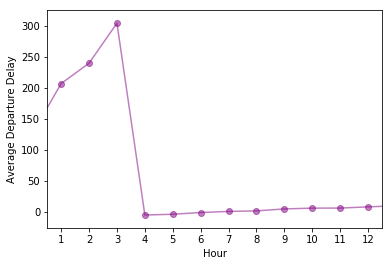

In [46]:
x = delay_by_hour_series.index
y = delay_by_hour_series.values
fig, ax = plt.subplots()
ax.plot(x, y, color = 'purple', alpha=0.5)
ax.scatter(x, y, color = 'purple', alpha=0.5)
ax.set(xlabel = 'Hour', ylabel = 'Average Departure Delay')
ax.set_xlim([0.5,12.5])
ax.set_xticks(np.arange(1,13))
plt.show()

**Answer: The departure delay gradually increases from 4 am in the morning. Late nights flights (between 1 am to 4 am) are significantly delayed.**

### The Final Exercise

Formulate a motivating question you want to explore using this data. Describe why it is interesting and perform an exploratory data analysis designed to address the question.

**Given that there are so many delayed flights, I am interested to check which carrier has the most number of delayed flights (by their departing time) in NYC. I want to find out which is the worst carrier in terms of departure delay.**

In [68]:
# Your codes here
delay_by_carrier_series = pd.DataFrame()
delay_by_carrier_series['numberof_delayed_flights'] = flights_df[flights_df['dep_delay'] > 0.0].groupby('carrier')['dep_delay'].count()
delay_by_carrier_series['carrier_average_flights'] = flights_df[flights_df['dep_delay'] > 0.0].groupby('carrier')['dep_delay'].agg(['mean'])

In [69]:
delay_by_carrier_series.head(10)

,numberof_delayed_flights,carrier_average_flights
carrier,,
9E,7063,48.920006
AA,10162,37.169258
AS,226,31.340708
B6,21445,39.794218
DL,15241,37.400236
EV,23139,50.329790
F9,341,45.137830
FL,1654,40.825877
HA,69,44.840580


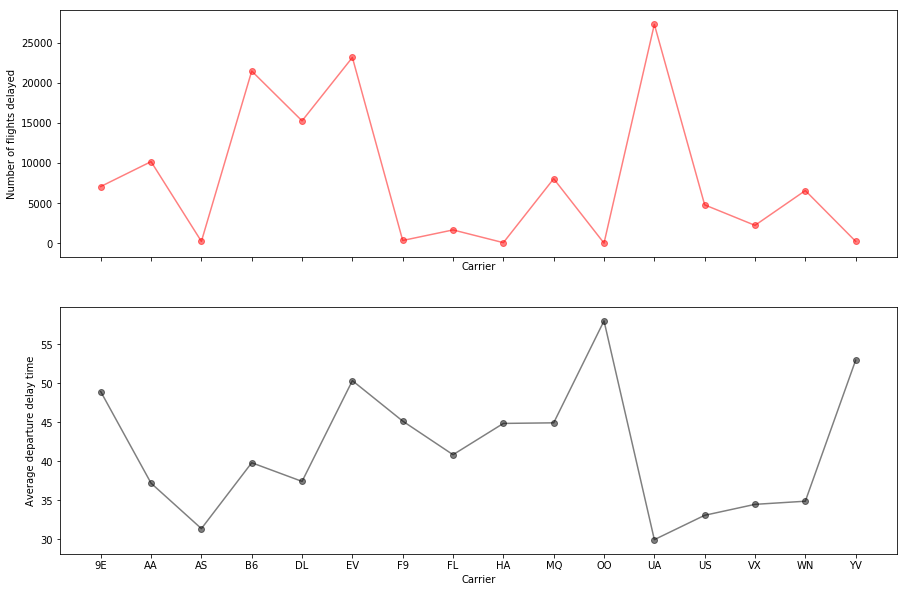

In [139]:
x = delay_by_carrier_series.index
y = delay_by_carrier_series.values
y1 = y[ : , 0]
fig, ax = plt.subplots(2,1, figsize=(15,10), sharex=True)
ax[0].plot(x, y1, color = 'red', alpha=0.5)
ax[0].scatter(x, y1, color = 'red', alpha=0.5)
ax[0].set(xlabel = 'Carrier', ylabel = 'Number of flights delayed')

y2 = y[ : , 1]
ax[1].plot(x, y2, color = 'black', alpha=0.5)
ax[1].scatter(x, y2, color = 'black', alpha=0.5)
ax[1].set(xlabel = 'Carrier', ylabel = 'Average departure delay time')
plt.show()

**Answer: From the plot, we see that the carrier EV has a large number of delayed flights, with a high average departure delay time.**